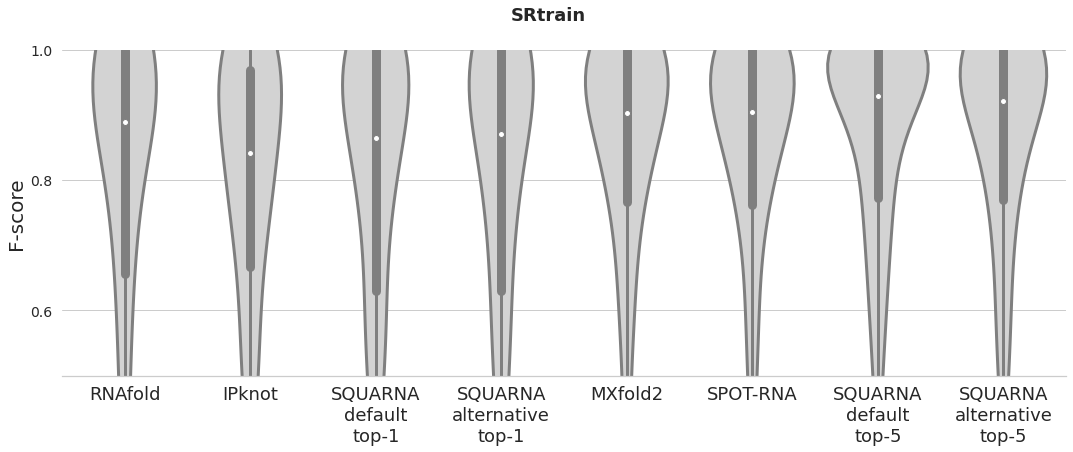

RNAfold RNAfold 1.0
RNAfold IPknot 0.7147486339315736
RNAfold SQUARNA 0.4706220796328947
RNAfold SQUARNAalt 0.7393698478461241
RNAfold MXfold2 0.003239669000687981
RNAfold SPOT-RNA 0.004278709011499459
RNAfold SQUARNA5 4.618423201882646e-06
RNAfold SQUARNAalt5 0.001277165634239691
IPknot RNAfold 0.7147486339315736
IPknot IPknot 1.0
IPknot SQUARNA 0.6987962004664451
IPknot SQUARNAalt 0.9799007228101061
IPknot MXfold2 0.005101720411147414
IPknot SPOT-RNA 0.006841927093003439
IPknot SQUARNA5 3.802114355159609e-06
IPknot SQUARNAalt5 0.001912760060230023
SQUARNA RNAfold 0.4706220796328947
SQUARNA IPknot 0.6987962004664451
SQUARNA SQUARNA 1.0
SQUARNA SQUARNAalt 0.6888021519481453
SQUARNA MXfold2 0.01724424496915953
SQUARNA SPOT-RNA 0.022069174562474474
SQUARNA SQUARNA5 3.0747286718905124e-05
SQUARNA SQUARNAalt5 0.007273086897759755
SQUARNAalt RNAfold 0.7393698478461241
SQUARNAalt IPknot 0.9799007228101061
SQUARNAalt SQUARNA 0.6888021519481453
SQUARNAalt SQUARNAalt 1.0
SQUARNAalt MXfold2 0.00

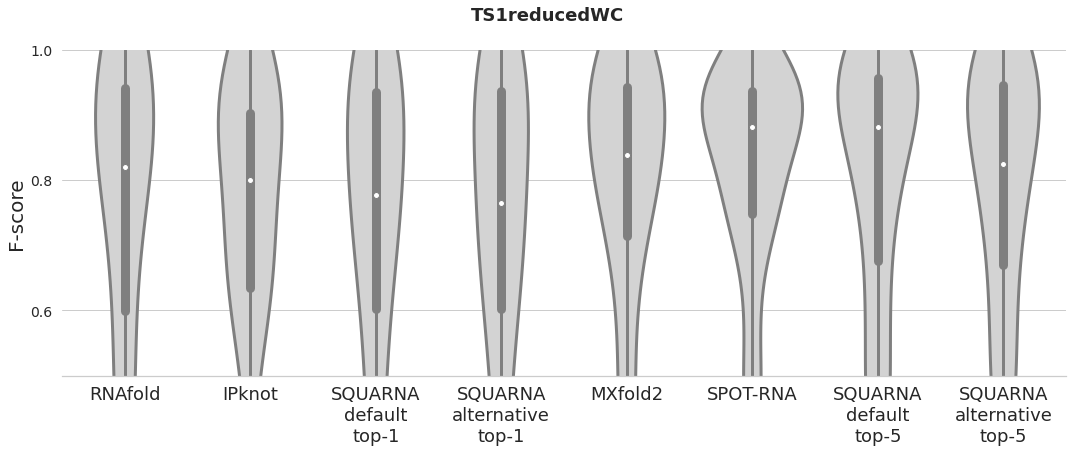

RNAfold RNAfold 1.0
RNAfold IPknot 0.7114118010975453
RNAfold SQUARNA 0.9464550887627303
RNAfold SQUARNAalt 0.8881999083177781
RNAfold MXfold2 0.1335344149726655
RNAfold SPOT-RNA 0.024724878464466225
RNAfold SQUARNA5 0.09675863666008636
RNAfold SQUARNAalt5 0.26251988654274366
IPknot RNAfold 0.7114118010975453
IPknot IPknot 1.0
IPknot SQUARNA 0.6435515130459506
IPknot SQUARNAalt 0.583751662512394
IPknot MXfold2 0.20303102240590437
IPknot SPOT-RNA 0.032095044874973076
IPknot SQUARNA5 0.14524352007872227
IPknot SQUARNAalt5 0.400100202686706
SQUARNA RNAfold 0.9464550887627303
SQUARNA IPknot 0.6435515130459506
SQUARNA SQUARNA 1.0
SQUARNA SQUARNAalt 0.9392703533738906
SQUARNA MXfold2 0.09730284743147469
SQUARNA SPOT-RNA 0.013596133478673483
SQUARNA SQUARNA5 0.06728176650752998
SQUARNA SQUARNAalt5 0.20939640430635714
SQUARNAalt RNAfold 0.8881999083177781
SQUARNAalt IPknot 0.583751662512394
SQUARNAalt SQUARNA 0.9392703533738906
SQUARNAalt SQUARNAalt 1.0
SQUARNAalt MXfold2 0.07872343192225262
S

In [26]:
#single-seq violins
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

for dataset in ("SRtrain","TS1reducedWC"):
    
    tools = "RNAfold IPknot SQUARNA SQUARNAalt MXfold2 SPOT-RNA SQUARNA5 SQUARNAalt5".split(' ')
    
    labels = ["RNAfold","IPknot", "SQUARNA\ndefault\ntop-1", 
              "SQUARNA\nalternative\ntop-1", 
              "MXfold2", "SPOT-RNA", 
              "SQUARNA\ndefault\ntop-5", 
              "SQUARNA\nalternative\ntop-5", ]
    
    res = {}
    
    for tool in tools:
        
        fscores = []
        
        with open("{0}/{0}_{1}.tsv".format(dataset,tool)) as tsv:
            lines = tsv.readlines()
            title = lines[0].strip().split('\t')
            fsind = title.index("FS")
            for line in lines[1:]:
                fscores.append(float(line.strip().split('\t')[fsind]))
            
        res[tool] = fscores
    
    sns.set(style="whitegrid")

    df = pd.DataFrame(res)

    f, ax = plt.subplots(figsize=(18, 6))
    
    ax.set_ylim([0.5,1.0])

    # Show each distribution with both violins and points
    sns.violinplot(data=df, inner="box", color='lightgrey', cut=2, linewidth=3)

    sns.despine(left=True)

    f.suptitle('{}'.format(dataset), fontsize=18, fontweight='bold')
    ax.set_ylabel("F-score",size = 20)
    ax.set_xticklabels(labels,fontsize=18)
    ax.set_yticks([0.6,0.8,1.0],labels=[0.6,0.8,1.0], size=14)
    
    plt.show()
    
    for tool1 in tools:
        for tool2 in tools:
            statres = stats.ttest_ind(res[tool1], res[tool2])
            print(tool1, tool2,statres.pvalue)


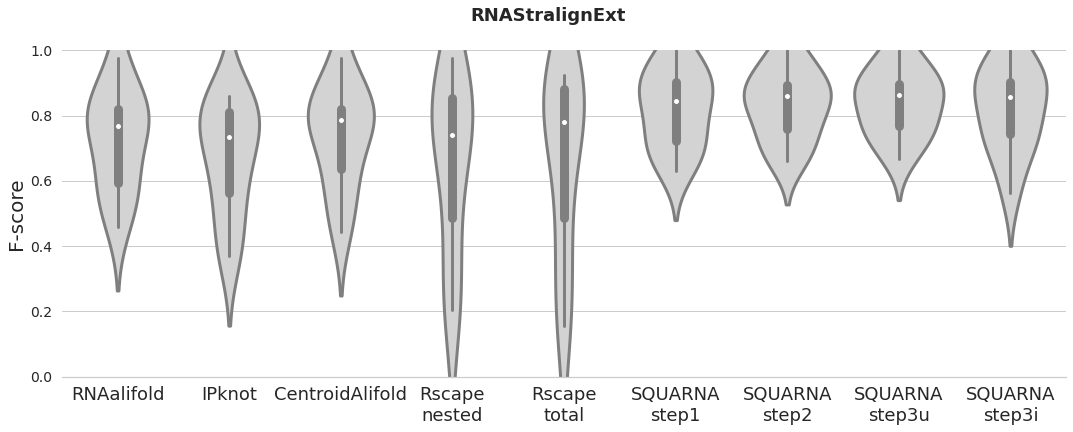

RNAalifold IPknot 0.762 0.4548475749158467
RNAalifold CentroidAlifold -0.171 0.8659771187358477
RNAalifold RscapeNested 0.726 0.4764413513034742
RNAalifold RscapeTotal 0.611 0.5482279201653416
RNAalifold SQUARNAs1 -1.633 0.11820087618442478
RNAalifold SQUARNAs2 -1.899 0.07213865025919812
RNAalifold SQUARNAs3u -2.052 0.05352438812646205
RNAalifold SQUARNAs3i -1.538 0.1396752294945722
IPknot CentroidAlifold -0.921 0.36808797906980717
IPknot RscapeNested 0.152 0.880886944748172
IPknot RscapeTotal 0.06 0.9524384509280837
IPknot SQUARNAs1 -2.381 0.027343230076437283
IPknot SQUARNAs2 -2.653 0.015271892278015644
IPknot SQUARNAs3u -2.806 0.010918837147861188
IPknot SQUARNAs3i -2.271 0.03431950589314791
CentroidAlifold RscapeNested 0.846 0.40778811238844004
CentroidAlifold RscapeTotal 0.727 0.4758398779116282
CentroidAlifold SQUARNAs1 -1.429 0.16841356370409885
CentroidAlifold SQUARNAs2 -1.684 0.10766490114776467
CentroidAlifold SQUARNAs3u -1.832 0.08187427895661185
CentroidAlifold SQUARNAs3i -

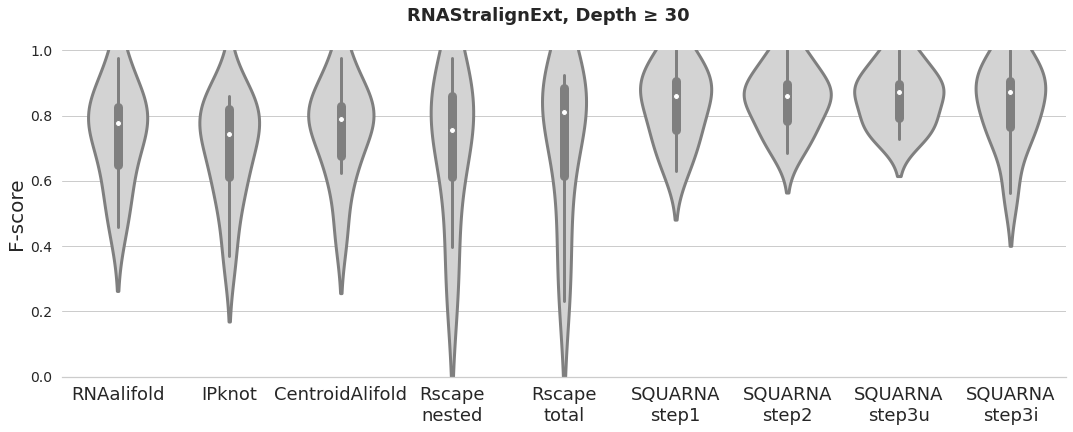

RNAalifold IPknot 0.64 0.5302362516547505
RNAalifold CentroidAlifold -0.239 0.8141179287863081
RNAalifold RscapeNested 0.441 0.6643474662997754
RNAalifold RscapeTotal 0.278 0.7842546562413385
RNAalifold SQUARNAs1 -1.548 0.1389642953884828
RNAalifold SQUARNAs2 -1.898 0.0738186188926681
RNAalifold SQUARNAs3u -2.06 0.054114139304101805
RNAalifold SQUARNAs3i -1.458 0.1619665054192675
IPknot CentroidAlifold -0.886 0.38744699901347834
IPknot RscapeNested -0.063 0.9506823812319546
IPknot RscapeTotal -0.219 0.8288191848119508
IPknot SQUARNAs1 -2.243 0.03774041985553974
IPknot SQUARNAs2 -2.628 0.017047383987250028
IPknot SQUARNAs3u -2.802 0.011776419222601546
IPknot SQUARNAs3i -2.13 0.047269344118964655
CentroidAlifold RscapeNested 0.63 0.5366002221424153
CentroidAlifold RscapeTotal 0.463 0.6488646231188222
CentroidAlifold SQUARNAs1 -1.31 0.20650768904172861
CentroidAlifold SQUARNAs2 -1.655 0.1152736383874148
CentroidAlifold SQUARNAs3u -1.817 0.08598226833893531
CentroidAlifold SQUARNAs3i -1.22

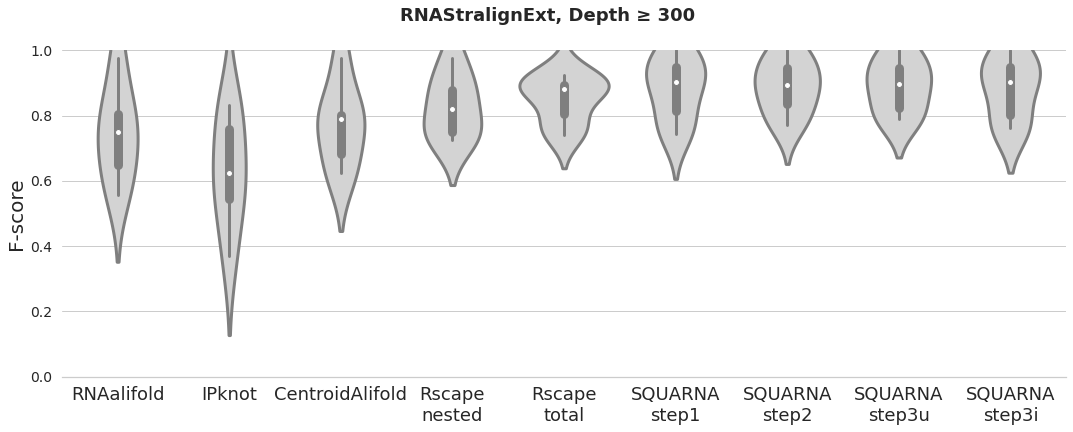

RNAalifold IPknot 1.257 0.23716961497955188
RNAalifold CentroidAlifold -0.339 0.7413391119595787
RNAalifold RscapeNested -1.127 0.2861147399501662
RNAalifold RscapeTotal -1.566 0.14838747125476034
RNAalifold SQUARNAs1 -1.894 0.0875000134000266
RNAalifold SQUARNAs2 -2.072 0.06510704703362608
RNAalifold SQUARNAs3u -2.086 0.06353717262504611
RNAalifold SQUARNAs3i -1.898 0.08687152577637153
IPknot CentroidAlifold -1.64 0.13202215752931623
IPknot RscapeNested -2.445 0.0345429877645913
IPknot RscapeTotal -2.902 0.015786262484586786
IPknot SQUARNAs1 -3.128 0.010724696303134728
IPknot SQUARNAs2 -3.319 0.007764438219634738
IPknot SQUARNAs3u -3.334 0.007562821132291814
IPknot SQUARNAs3i -3.134 0.010620032267817039
CentroidAlifold RscapeNested -0.831 0.42543218168039265
CentroidAlifold RscapeTotal -1.306 0.22070555601707648
CentroidAlifold SQUARNAs1 -1.677 0.12452142617699173
CentroidAlifold SQUARNAs2 -1.873 0.09060624651988994
CentroidAlifold SQUARNAs3u -1.889 0.08821694661917139
CentroidAlifold

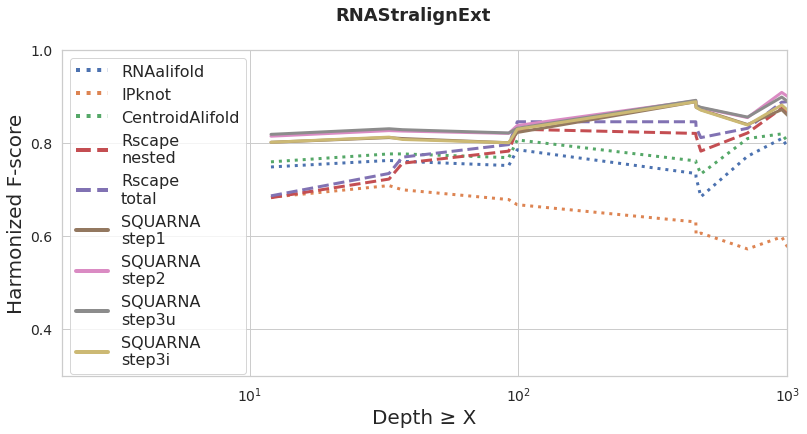

In [4]:
#alignment-based violins
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy import stats

def FScore(tp,fp,fn):
    if not tp+fp+fn:
        return 1, 1, 1
    return round(2*tp / (2*tp+fp+fn),3), round(tp / (tp+fp),3) if (tp+fp) else 1, round(tp / (tp+fn),3) if (tp+fn) else 1

def Harmonized(fs1,fs2):
    return round(2*fs1*fs2/(fs1+fs2),3)

for dataset in ("RNAStralignExt",):# "Rfam14.9", "RfamPDB",):
     
    tools = "RNAalifold IPknot CentroidAlifold RscapeNested RscapeTotal SQUARNAs1 SQUARNAs2 SQUARNAs3u SQUARNAs3i".split(' ')
    
    labels = ["RNAalifold","IPknot",
              "CentroidAlifold","Rscape\nnested","Rscape\ntotal",
              "SQUARNA\nstep1","SQUARNA\nstep2","SQUARNA\nstep3u","SQUARNA\nstep3i"]
    
    #tools = "RNAalifold IPknot CentroidAlifold RscapeNested RscapeTotal SQUARNAs1 SQUARNAs2 SQUARNAs3i SQUARNAs3u".split(' ')
    
    #labels = ["RNAalifold","IPknot",
    #          "CentroidAlifold","Rscape\nnested","Rscape\ntotal",
    #          "SQUARNA\nstep1","SQUARNA\nstep2","SQUARNA\nstep3i","SQUARNA\nstep3u"]
    
    res = {}
    resTP = {}
    resFP = {}
    resFN = {}
    res100 = {}
    res10 = {}
    
    for tool in tools:
        
        fscores = []
        fscores10 = []
        fscores100 = []
        tps = []
        fps = []
        fns = []
        depths  = []
        lengths = []
        
        with open("{0}/{0}_{1}.tsv".format(dataset,tool)) as tsv:
            lines = tsv.readlines()
            title = lines[0].strip().split('\t')
            fsind = title.index("FS")
            dpind = title.index("DEPTH")
            famind = title.index("NAME")
            lnind = title.index("LEN")
            tpind = title.index("TP")
            fpind = title.index("FP")
            fnind = title.index("FN")
            for line in lines[1:]:
                #if line.strip().split('\t')[famind] in fams:
                depths.append(int(line.strip().split('\t')[dpind]))
                if depths[-1]>=30:
                    fscores10.append(float(line.strip().split('\t')[fsind]))
                if depths[-1]>=300:
                    fscores100.append(float(line.strip().split('\t')[fsind]))
                lengths.append(int(line.strip().split('\t')[lnind]))
                fscores.append(float(line.strip().split('\t')[fsind]))
                tps.append(int(line.strip().split('\t')[tpind]))
                fps.append(int(line.strip().split('\t')[fpind]))
                fns.append(int(line.strip().split('\t')[fnind]))
            
        res[tool] = fscores
        res10[tool] = fscores10
        res100[tool] = fscores100
        resTP[tool] = tps
        resFP[tool] = fps
        resFN[tool] = fns
    
    sns.set(style="whitegrid")
    df = pd.DataFrame(res)
    f, ax = plt.subplots(figsize=(18, 6))
    ax.set_ylim([0.0,1.0])
    # Show each distribution with both violins and points
    sns.violinplot(data=df, inner="box", color='lightgrey', cut=2, linewidth=3)
    sns.despine(left=True)
    f.suptitle('{}'.format(dataset), fontsize=18, fontweight='bold')
    ax.set_ylabel("F-score",size = 20)
    ax.set_xticklabels(labels,fontsize=18)
    ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],
                  labels=[0.0,0.2,0.4,0.6,0.8,1.0], size=14)
    plt.show()
    
    for tool1 in tools:
        for tool2 in tools[tools.index(tool1)+1:]:
            statres = stats.ttest_ind(res[tool1], res[tool2])
            print(tool1, tool2, round(statres.statistic,3), statres.pvalue)
    
    sns.set(style="whitegrid")
    df = pd.DataFrame(res10)
    f, ax = plt.subplots(figsize=(18, 6))
    ax.set_ylim([0.0,1.0])
    # Show each distribution with both violins and points
    sns.violinplot(data=df, inner="box", color='lightgrey', cut=2, linewidth=3)
    sns.despine(left=True)
    f.suptitle('{}, Depth ≥ 30'.format(dataset), fontsize=18, fontweight='bold')
    ax.set_ylabel("F-score",size = 20)
    ax.set_xticklabels(labels,fontsize=18)
    ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],
                  labels=[0.0,0.2,0.4,0.6,0.8,1.0], size=14)
    plt.show()
    
    for tool1 in tools:
        for tool2 in tools[tools.index(tool1)+1:]:
            statres = stats.ttest_ind(res10[tool1], res10[tool2])
            print(tool1, tool2, round(statres.statistic,3), statres.pvalue)
            
    sns.set(style="whitegrid")
    df = pd.DataFrame(res100)
    f, ax = plt.subplots(figsize=(18, 6))
    ax.set_ylim([0.0,1.0])
    # Show each distribution with both violins and points
    sns.violinplot(data=df, inner="box", color='lightgrey', cut=2, linewidth=3)
    sns.despine(left=True)
    f.suptitle('{}, Depth ≥ 300'.format(dataset), fontsize=18, fontweight='bold')
    ax.set_ylabel("F-score",size = 20)
    ax.set_xticklabels(labels,fontsize=18)
    ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],
                  labels=[0.0,0.2,0.4,0.6,0.8,1.0], size=14)
    plt.show()
    
    for tool1 in tools:
        for tool2 in tools[tools.index(tool1)+1:]:
            statres = stats.ttest_ind(res100[tool1], res100[tool2])
            print(tool1, tool2, round(statres.statistic,3),statres.pvalue)
    
    f, ax = plt.subplots(figsize=(13, 6))
    f.suptitle('{}'.format(dataset), fontsize=18, fontweight='bold')
    ax.set_ylim([0.3,1.0])
    ax.set_xlim([2,1000])
    for k,tool in enumerate(tools):
        nums   = res[tool]
        numsTP = resTP[tool]
        numsFP = resFP[tool]
        numsFN = resFN[tool]
        pairs = [(depths[i], numsTP[i],
                 numsFP[i],numsFN[i],nums[i]) for i in range(len(depths))]
        pairs.sort()
        dat = {}
        for i in range(len(pairs)):
            dat[pairs[i][0]] = Harmonized(FScore(sum([p[1] for p in pairs[i:]]),
                                      sum([p[2] for p in pairs[i:]]),
                                      sum([p[3] for p in pairs[i:]]))[0],
                                          np.mean([p[4] for p in pairs[i:]]))
                                          
        dat = sorted(dat.items())
        xx  = [d[0] for d in dat]
        yy  = [d[1] for d in dat]
        if tool.startswith('Rscape'):
            ax.plot(xx,yy,label=labels[k], linewidth=3, ls='--')
        elif tool.startswith("SQUARNA"):
            ax.plot(xx,yy,label=labels[k], linewidth=3)
        else:
            ax.plot(xx,yy,label=labels[k], linewidth=3, ls=':')
    # get the legend object
    leg = ax.legend(fontsize=16)

    # change the line width for the legend
    for line in leg.get_lines():
        line.set_linewidth(4)
    ax.set_ylabel("Harmonized F-score", fontsize=20)
    ax.set_xlabel("Depth ≥ X", fontsize=20)
    ax.set_yticks([0.4,0.6,0.8,1.0],
                  labels=[0.4,0.6,0.8,1.0], size=14)
    ax.set_xticks([10,100,1000],
                  labels=[10,100,1000], size=14)
    ax.set_xscale("log")
    plt.show()

In [ ]:
# saved just in case
    f, ax = plt.subplots(figsize=(10, 6))
    f.suptitle('{}'.format(dataset), fontsize=18, fontweight='bold')
    ax.set_ylim([0.0,1.0])
    ax.set_xlim([2,2000])
    for k,tool in enumerate(tools):
        nums = res[tool]
        pairs = [(depths[i], nums[i]) for i in range(len(depths))]
        pairs.sort()
        dat = {}
        for i in range(len(pairs)):
            dat[pairs[i][0]] = np.mean([p[1] for p in pairs[:i+1]])
        dat = sorted(dat.items())
        xx  = [d[0] for d in dat]
        yy  = [d[1] for d in dat]
        ax.plot(xx,yy,label=labels[k], linewidth=2)
    plt.legend(fontsize=16)
    ax.set_ylabel("Mean F-score", fontsize=20)
    ax.set_xlabel("Depth ≤ X", fontsize=20)
    ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],
                  labels=[0.0,0.2,0.4,0.6,0.8,1.0], size=14)
    ax.set_xticks([10,100,1000],
                  labels=[10,100,1000], size=14)
    ax.set_xscale("log")
    plt.show()
    
    f, ax = plt.subplots(figsize=(10, 6))
    f.suptitle('{}'.format(dataset), fontsize=18, fontweight='bold')
    ax.set_ylim([0.0,1.0])
    ax.set_xlim([2,2000])
    for k,tool in enumerate(tools):
        nums = res[tool]
        pairs = [(depths[i], nums[i]) for i in range(len(depths))]
        pairs.sort()
        dat = {}
        for i in range(len(pairs)):
            dat[pairs[i][0]] = np.mean([p[1] for p in pairs[i:]])
        dat = sorted(dat.items())
        xx  = [d[0] for d in dat]
        yy  = [d[1] for d in dat]
        ax.plot(xx,yy,label=labels[k], linewidth=2)
    plt.legend(fontsize=16)
    ax.set_ylabel("Mean F-score", fontsize=20)
    ax.set_xlabel("Depth ≥ X", fontsize=20)
    ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],
                  labels=[0.0,0.2,0.4,0.6,0.8,1.0], size=14)
    ax.set_xticks([10,100,1000],
                  labels=[10,100,1000], size=14)
    ax.set_xscale("log")
    plt.show()

    
    f, ax = plt.subplots(figsize=(10, 6))
    f.suptitle('{}'.format(dataset), fontsize=18, fontweight='bold')
    ax.set_ylim([0.0,1.0])
    ax.set_xlim([2,2000])
    for k,tool in enumerate(tools):
        numsTP = resTP[tool]
        numsFP = resFP[tool]
        numsFN = resFN[tool]
        pairs = [(depths[i], numsTP[i],
                 numsFP[i],numsFN[i],) for i in range(len(depths))]
        pairs.sort()
        dat = {}
        for i in range(len(pairs)):
            dat[pairs[i][0]] = FScore(sum([p[1] for p in pairs[:i+1]]),
                                      sum([p[2] for p in pairs[:i+1]]),
                                      sum([p[3] for p in pairs[:i+1]]))[0]
        dat = sorted(dat.items())
        xx  = [d[0] for d in dat]
        yy  = [d[1] for d in dat]
        ax.plot(xx,yy,label=labels[k], linewidth=2)
    plt.legend(fontsize=16)
    ax.set_ylabel("Total F-score", fontsize=20)
    ax.set_xlabel("Depth ≤ X", fontsize=20)
    ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],
                  labels=[0.0,0.2,0.4,0.6,0.8,1.0], size=14)
    ax.set_xticks([10,100,1000],
                  labels=[10,100,1000], size=14)
    ax.set_xscale("log")
    plt.show()
    
    f, ax = plt.subplots(figsize=(10, 6))
    f.suptitle('{}'.format(dataset), fontsize=18, fontweight='bold')
    ax.set_ylim([0.0,1.0])
    ax.set_xlim([2,2000])
    for k,tool in enumerate(tools):
        numsTP = resTP[tool]
        numsFP = resFP[tool]
        numsFN = resFN[tool]
        pairs = [(depths[i], numsTP[i],
                 numsFP[i],numsFN[i],) for i in range(len(depths))]
        pairs.sort()
        dat = {}
        for i in range(len(pairs)):
            dat[pairs[i][0]] = FScore(sum([p[1] for p in pairs[i:]]),
                                      sum([p[2] for p in pairs[i:]]),
                                      sum([p[3] for p in pairs[i:]]))[0]
        dat = sorted(dat.items())
        xx  = [d[0] for d in dat]
        yy  = [d[1] for d in dat]
        ax.plot(xx,yy,label=labels[k], linewidth=2)
    plt.legend(fontsize=16)
    ax.set_ylabel("Total F-score", fontsize=20)
    ax.set_xlabel("Depth ≥ X", fontsize=20)
    ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],
                  labels=[0.0,0.2,0.4,0.6,0.8,1.0], size=14)
    ax.set_xticks([10,100,1000],
                  labels=[10,100,1000], size=14)
    ax.set_xscale("log")
    plt.show()
    
    f, ax = plt.subplots(figsize=(10, 6))
    f.suptitle('{}'.format(dataset), fontsize=18, fontweight='bold')
    ax.set_ylim([0.0,1.0])
    ax.set_xlim([2,2000])
    for k,tool in enumerate(tools):
        nums   = res[tool]
        numsTP = resTP[tool]
        numsFP = resFP[tool]
        numsFN = resFN[tool]
        pairs = [(depths[i], numsTP[i],
                 numsFP[i],numsFN[i],nums[i]) for i in range(len(depths))]
        pairs.sort()
        dat = {}
        for i in range(len(pairs)):
            dat[pairs[i][0]] = Harmonized(FScore(sum([p[1] for p in pairs[:i+1]]),
                                      sum([p[2] for p in pairs[:i+1]]),
                                      sum([p[3] for p in pairs[:i+1]]))[0],
                                          np.mean([p[4] for p in pairs[:i+1]]))
                                          
        dat = sorted(dat.items())
        xx  = [d[0] for d in dat]
        yy  = [d[1] for d in dat]
        ax.plot(xx,yy,label=labels[k], linewidth=2)
    plt.legend(fontsize=16)
    ax.set_ylabel("Harmonized F-score", fontsize=20)
    ax.set_xlabel("Depth ≤ X", fontsize=20)
    ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],
                  labels=[0.0,0.2,0.4,0.6,0.8,1.0], size=14)
    ax.set_xticks([10,100,1000],
                  labels=[10,100,1000], size=14)
    ax.set_xscale("log")
    plt.show()

In [35]:
# for summary_ali.xlsx
import numpy as np

def FScore(tp,fp,fn):
    if not tp+fp+fn:
        return 1, 1, 1
    return round(2*tp / (2*tp+fp+fn),3), round(tp / (tp+fp),3) if (tp+fp) else 1, round(tp / (tp+fn),3) if (tp+fn) else 1

dataset = "RNAStralignExt"
tool = "SQUARNAs3u"
depthlim = 300

data = []

tim = 0

with open("{0}/{0}_{1}.tsv".format(dataset,tool)) as tsv:
        lines  = tsv.readlines()
        title  = lines[0].strip().split('\t')
        fsind  = title.index("FS")
        prcind = title.index("PRC")
        rclind = title.index("RCL")
        dpind  = title.index("DEPTH")
        tpind  = title.index("TP")
        fpind  = title.index("FP")
        fnind  = title.index("FN")
        tind   = title.index("TIME")
        for line in lines[1:]:
            linesplit = line.strip().split('\t')
            depth = int(linesplit[dpind])
            tim = linesplit[tind]
            if depth >= depthlim:
                data.append([int(linesplit[tpind]),
                             int(linesplit[fpind]),
                             int(linesplit[fnind]),
                             float(linesplit[fsind]),
                             float(linesplit[prcind]),
                             float(linesplit[rclind]),])
                
print("Total FS PRC RCL", FScore(sum(d[0] for d in data),
                                 sum(d[1] for d in data),
                                 sum(d[2] for d in data)))
print("Mean  FS PRC RCL", (round(np.mean([d[3] for d in data]),3),
                         round(np.mean([d[4] for d in data]),3),
                         round(np.mean([d[5] for d in data]),3)))
print("Time", tim+" sec")

Total FS PRC RCL (0.892, 0.9, 0.885)
Mean  FS PRC RCL (0.886, 0.886, 0.887)
Time 798.95 sec


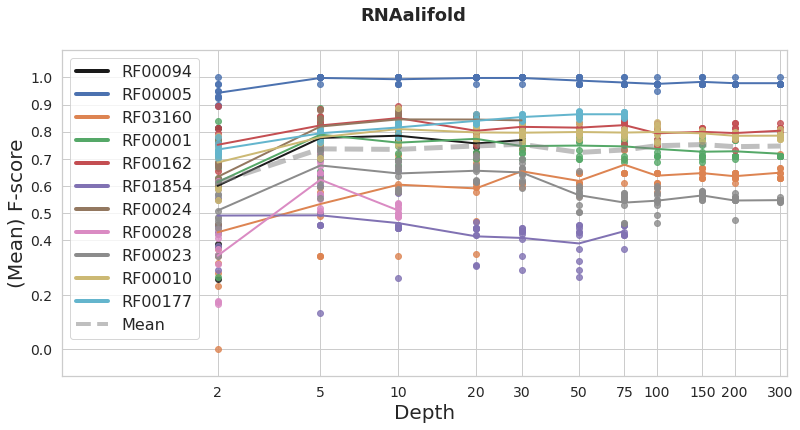

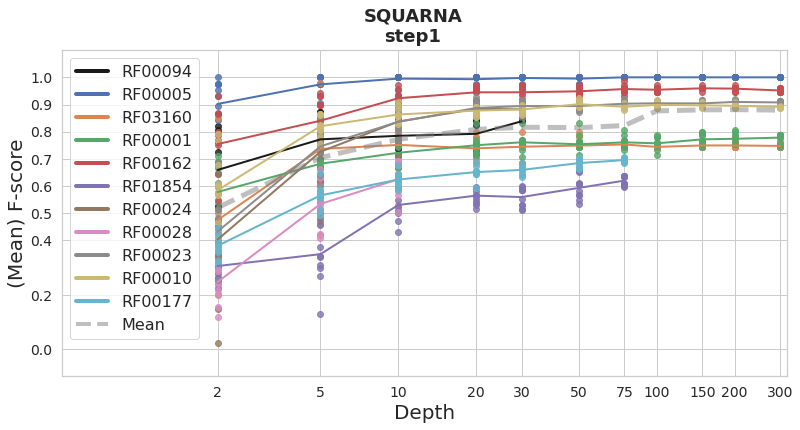

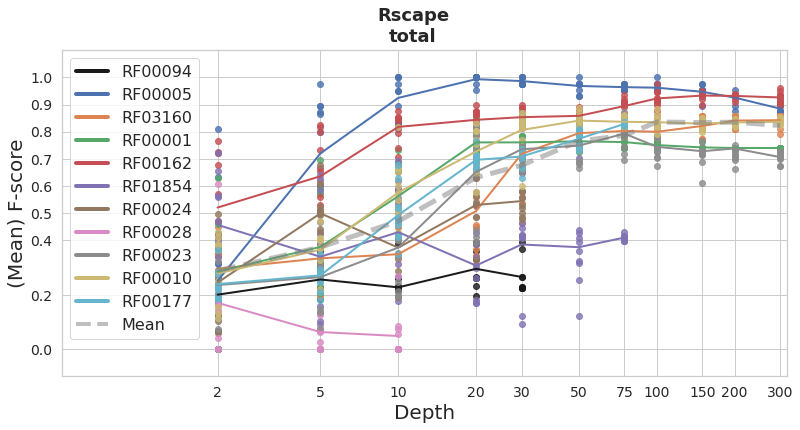

RNAalifold [0.613, 0.737, 0.735, 0.748, 0.754, 0.724, 0.733, 0.748, 0.753, 0.745, 0.747]
SQUARNAs1 [0.52, 0.704, 0.772, 0.808, 0.816, 0.815, 0.823, 0.876, 0.88, 0.881, 0.879]
RscapeTotal [0.289, 0.375, 0.471, 0.631, 0.676, 0.765, 0.786, 0.836, 0.833, 0.835, 0.823]


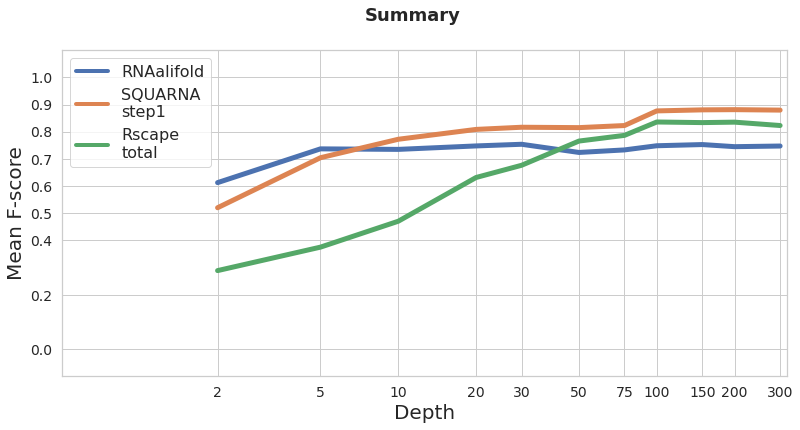

In [5]:
# For SubAli graphs
import numpy as np
import matplotlib.pyplot as plt

dataset = "SubAli"

labels = {"RNAalifold":"RNAalifold",
          "SQUARNAs1":"SQUARNA\nstep1",
          "RscapeTotal":"Rscape\ntotal"}

depths = [2,5,10,20,30,50,75,100,150,200,300]
dd = {depths[i]:i for i in range(len(depths))}

totalY = {}
tools = "RNAalifold SQUARNAs1 RscapeTotal".split()

for tool in tools:# 



    fams = {}

    with open("{0}/{0}_{1}.tsv".format(dataset,tool)) as tsv:
            lines  = tsv.readlines()
            title  = lines[0].strip().split('\t')
            fsind  = title.index("FS")
            dpind  = title.index("DEPTH")
            famind = title.index("NAME")
            for line in lines[1:]:
                linesplit = line.strip().split('\t')
                fam = linesplit[famind].split("_")[0]
                if fam not in fams:
                    fams[fam] = {}
                depth  = int(linesplit[dpind])
                fscore = float(linesplit[fsind])
                if depth not in fams[fam]:
                    fams[fam][depth] = []
                fams[fam][depth].append(fscore)

    f, ax = plt.subplots(figsize=(13, 6))
    f.suptitle('{}'.format(labels[tool]), fontsize=18, fontweight='bold')
    ax.set_ylim([-0.1,1.1])
    ax.set_xlim([0.5,320])

    YY = [[] for _ in depths]
    
    for fam in fams:

        xx = [d for d in depths if d in fams[fam]]
        yy = [np.mean(fams[fam][_]) for _ in xx]
        
        for k,_ in enumerate(yy):
            YY[dd[xx[k]]].append(_)

        dots = [(dp,fs) for dp in fams[fam] for fs in fams[fam][dp]]

        if fam=="RF00094":
            plt.plot(xx,yy, label = fam, color='k', linewidth=2)
            plt.scatter([d[0] for d in dots],[d[1] for d in dots],color='k',alpha=0.8)
        else:
            plt.plot(xx,yy, label = fam, linewidth=2)
            plt.scatter([d[0] for d in dots],[d[1] for d in dots],alpha=0.8)

            
    plt.plot(depths,[np.mean(_) for _ in YY],linewidth=5,ls="--", color="gray", alpha=0.5, label="Mean")
    
    totalY[tool] = [np.mean(_) for _ in YY]
    # get the legend object
    leg = ax.legend(fontsize=16)

    # change the line width for the legend
    for line in leg.get_lines():
        line.set_linewidth(4)
    ax.set_ylabel("(Mean) F-score", fontsize=20)
    ax.set_xlabel("Depth", fontsize=20)
    ax.set_yticks([0.0,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
                    labels=[0.0,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1.0], size=14)
    ax.set_xscale("log")
    ax.set_xticks([2,5,10,20,30,50,75,100,150,200,300],
                    labels=[2,5,10,20,30,50,75,100,150,200,300], size=14)
    plt.show()
    
f, ax = plt.subplots(figsize=(13, 6))
f.suptitle('Summary', fontsize=18, fontweight='bold')
ax.set_ylim([-0.1,1.1])
ax.set_xlim([0.5,320])
            
for tool in tools:
    print(tool,[round(g,3) for g in totalY[tool]])
    plt.plot(depths,totalY[tool],linewidth=5, label=labels[tool])
    
# get the legend object
leg = ax.legend(fontsize=16)

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4)
ax.set_ylabel("Mean F-score", fontsize=20)
ax.set_xlabel("Depth", fontsize=20)
ax.set_yticks([0.0,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
                labels=[0.0,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1.0], size=14)
ax.set_xscale("log")
ax.set_xticks([2,5,10,20,30,50,75,100,150,200,300],
                labels=[2,5,10,20,30,50,75,100,150,200,300], size=14)
plt.show()